### Problem Framing and Pitch

The user buys an Oura ring in order to monitor their every activity, level of readiness and also monitor their sleep. They can see this data as often as they like on the Oura cloud. They want to improve their lifestyle and health. However, Oura does not offer any transformative insight into why someone is sleeping they way they are.

In general we can agree:

- Everybody knows what habits are healthy, but it’s hard to know what is most healthy for you
- What if your habits were used to produce a recommendation to help you feel and perform better?
- Since sleep has multifactorial causes on mood and productivity...

Hence the question...Could we improve sleep? We don't think of this as a simple regression or classification problem rather a 'change someone's daily habits over time' problem. We plan to build a strong model that can give a set of important features that an inidividual can see they are most effected by. While a model will have many features, an individual will be effected by a range of factors over time and we can tell them, which factors are generally considered strong determinants of good sleep and they can apply changes over time and see improvements.


### The Client

Our client is memento labs. They have allows us to use real data that comes from Oura ring bearers who have agreed under a research agreement to allow memento labs to collect and use this data for research. We are meeting with the client and researchers in the space in order to learn about this phenomena of sleep and its major determinants. While we are using machine learning, our goal is not just to acheive prediction accuracy, but also model interpretability and drive transformation in the lives of the users over time so they can find benefits from predictive analytics from Oura data.

#### Methodology

<div class="alert alert-block alert-info">
<b>Methodology   :</b> We have developed a simple yet repeatable experiment pipeline. We will complete the following 5 steps below and provide a summary of learnings for the next iteration.
</div>

<div class="alert alert-block alert-info">
<b> We have two major deliverables:</b> 1. final model object that can help us score and 2. explain the top 5-10 features that explain that score. We will not just use the feature importance but also perform LIME analysis in order to understand the directional importance of the features on quality of sleep
</div>


<div class="alert alert-block alert-info">
<b>Iteration 1:</b> Major objective is to develop a baseline understanding of the data and the learning feasible with a minimal number of transformations and aggregations.
</div>

<div class="alert alert-block alert-info">
<b> 1. Ingest Data:</b> Capture JSON data feed from Memento labs
server and tranfrom into four structured tables for further processing
</div>

> This step involved a set of tasks that only need to be done when fetching new data. We have decided to fix the date range to limit data until October 14th, 2019. This allows us to build a generalizatioble model using various linear and non-linear methods. The data comes with some API literature from the wearable device maker, this has helped us further understand the dataset.

<div class="alert alert-block alert-info">
<b>2. Feature Exploration and Preprocessing:</b> Take the structured tables and analyse their properties, distributions, relationships with one another and finalize a set of processing routines
</div>

> This data has many properties that vary over time however time in itself has less to do with sleep. It is the activity, readiness and routine that effects sleep. We plan to not go into a mechanical treatment of the data rather using our domain knowledge and some basic preprocessing and transforms to buiold a model that will generalize well as a baseline.

<div class="alert alert-block alert-info">
<b>3. Model + Feature Tuning:</b> Take the initial set of features and train a range of models, review the importance of features and their properties to identify adjustments needed
</div>

> This data presents some unique challanges thus we need to identify a set of meaningful features that we can use to later guide and ediucate the consumer for making modification in their lifestyle in order to test and learn from their wearable and this analytical model.

<div class="alert alert-block alert-info">
<b>4. Feature Evolution:</b> Based on feature importance, disributions, try a set of feature modifications that help the model learn more from these features
</div>

> The goal of our feature evolution exercixe is to maintain a balance between transformation and meaningfulness. The transformations would be used to remedy problems with the features that can result in modeling issues, however, we will try to minimize complex features that may not be easy to understand for the end user.

<div class="alert alert-block alert-info">
<b>5. Final model validation:</b> We take the final model and perform cross validation and find out the paramters that will allow the model to generalize on never before seen data
</div>

> The goal of this iteration to learn from this experiment and find the balance of feature evilution - model and interpretability

### The Data set

The Oura data has 3 categories - Sleep, Activity and Readiness. This is well documented [here](https://cloud.ouraring.com/docs/). We have used this to build a data dictionary that is saved on the Github repo. This dictionary calls out the metadata and the transformations and aggregations we have performed for this first iteration. 

<div class="alert alert-block alert-info">
<b> 1. Ingest Data:</b> Capture JSON data feed from Memento labs
server and tranfrom into four structured tables for further processing
</div>

> This step involved a set of tasks that only need to be done when fetching new data. We have decided to fix the date range to limit data until October 14th, 2019. This allows us to build a generalizatioble model using various linear and non-linear methods. The data comes with some API literature from the wearable device maker, this has helped us further understand the dataset.

The following section downloads data from Oura API and exports into CSV exports can only handle 1 user. As we are using pre-authorized data from Memento labs, we are able to use records of several Oura users all at once. The following code has been developed to ingest the raw JSON file and then break it down into a relational schedule of 4 tables that have all users, sleep, readiness and activity data - all tables can be joined using the unique `user_id` key that is a primary key in the users table and a foreign key in the other 3 data tables.

For more info on Oura API, see [Oura Documentation](https://cloud.ouraring.com/docs/)

<div class="alert alert-block alert-info">
<b> Dependencies and Libraries:</b> The following code section focuses only on the libraries needed for the ingestion and basic data munging. Each section will capture libraries used for that perticular section's analysis.
</div>

<div class="alert alert-block alert-info">
<b> Installing missing libraries:</b> A sample code snippet for when you find a perticular library is missing. As this implementation is inside a docker container, it is key to properly install packages within the docker container as following:
</div>

```
!pip install --user numpy scipy matplotlib ipython pandas sympy nose statsmodels patsy seaborn
```

>the above snippet can use used right here in Jupyter notebook, the `--user` flag is key to make sure the current environment is updated. 







In [2]:
import requests,json,numpy as np,pandas as pd,csv,gzip
import zipfile,zlib,time,matplotlib,seaborn
from zipfile import ZipFile
from os import mkdir
from datetime import datetime,date
from pandas.io.json import json_normalize
import json
import numpy as np
import pandas as pd
import os
import zipfile
from zipfile import ZipFile
from datetime import datetime, date
import time
import requests

In [3]:
## Import and setup customized python files

import os
import sys

sys.path.append(os.getcwd() + '/modules')
import oura_data_pipeline

In [4]:
%reload_ext autoreload
%autoreload 2
main_time_counter = time.time()

<div class="alert alert-block alert-info">
<b> Authentication & Download:</b> Memento Labs has provided (Sep 3rd, 2019) access credentials for us to download the data. The following cell has been saved here in order to maintain a future need to ingest more data. Authentication information will not be used after running and extracting this data. The following section does not need to run anymore as of October 14th, we have extracted the needed dataset and due to capacity contraints on the server, have decided to only pull additional data when we schedule the next ingestion.
</div>

In [5]:
%%time
full_path = 'data_ingestion/{}'.format(date.today().strftime('%d%m%Y'))
os.makedirs(full_path, exist_ok=True)

# create a simple "log file" on the log ingestion directory. Can be helpful to debug and later on for feature monitoring.
log_file = open(full_path + '/log.txt', 'a+')
log_file.write(time.asctime() + ' - Starting data ingestion process\n')

# if a data file exists, load it, otherwise, create the directory, download a new one and load the DFs:
if not os.path.isfile(full_path + '/raw_dataset.zip'):    
    start = time.time() # time the data ingestion from Memento
    log_file.write(time.asctime() + ' - Day file not found. Starting data download\n')
    
    # try: 
    ACCESS_TOKEN = ##ENTER ENVIRONMENT VARIABLE HERE##
    headers = {'Authorization': 'Bearer ' + ACCESS_TOKEN }
    URL = "https://api.mementolabs.io/data/dataset"
    # changed this code to deal with streaming json from 10/20/2019 on. Must double check if this will be the final 
    # format
    data = requests.get(URL, headers=headers).content.decode(encoding='utf-8')

    # save the raw data to disk as zip it to allow re-processing without new download
    zip_file = full_path + '/raw_dataset.zip'
    zipObj = ZipFile(zip_file, 'w', compression=zipfile.ZIP_DEFLATED)
    zipObj.writestr('raw_dataset.txt', data)
    zipObj.close()

    # print('total run time:',time.time() - start)
    log_file.write(time.asctime() + ' - JSON File downloaded and saved. Time: ' + f'{(time.time() - start):.1f}' + ' secs.\n')
    

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 368 µs


In [6]:
%%time
## All pipeline work has been moved to the /modules folder
## the below function has been moved to the oura_data_pipeline.py file
## this function is being called and returns dataframes
zipfl = '/raw_dataset.zip'
fname = 'raw_dataset.txt'
users, sleep, readiness, activity, experiments = oura_data_pipeline.create_all_features(zipfl,fname,full_path,log_file)

/opt/h2oai/dai/python/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


CPU times: user 44.8 s, sys: 1.52 s, total: 46.4 s
Wall time: 46.3 s


In [7]:
%%time
users.shape, sleep.shape, readiness.shape, activity.shape, experiments.shape

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 115 µs


((89, 7), (23628, 87), (24347, 10), (24311, 67), (61, 41))

In [8]:
%%time
## Create the datafiles for storage on data foundary folder
## data files can be reused for range of modeling efforts

start = time.time()

# Save each DF as a csv file (case needed to work on a single file in teh future
users_file_path = full_path + '/users_data.csv'
sleep_file_path = full_path + '/sleep_data.csv'
readiness_file_path = full_path + '/readiness_data.csv'
activity_file_path = full_path + '/activity_data.csv'
df_gold_file_path = full_path + '/gold.csv'
experiments_file_path = full_path + '/experiments.csv'

users.to_csv(users_file_path, index=None, encoding='utf-8')
sleep.to_csv(sleep_file_path, index_label='user_date', encoding='utf-8')
readiness.to_csv(readiness_file_path, index_label='user_Date', encoding='utf-8')
activity.to_csv(activity_file_path, index_label='user_Date', encoding='utf-8')
experiments.to_csv(experiments_file_path, index=None, encoding='utf-8')

# Drop duplicate columns and merge all dfs in a big "gold" df. Will keep only one of the summary dates (readiness)
# sleep.drop('summary_date', axis=1, inplace=True)
# activity.drop(['bedtime_start', 'bedtime_end', 'summary_date'], axis=1, inplace=True)

# merge all data frames into one
df_gold = sleep.merge(activity, left_index=True, right_index=True)
df_gold = df_gold.merge(readiness, left_index=True, right_index=True)

df_gold.to_csv(df_gold_file_path, index_label='user_date', encoding='utf-8')

log_file.write(time.asctime() + '     - GOLD data frame shape: ' + str(df_gold.shape) + '\n')

# zip all files in a gold_dataset.zip
files = [users_file_path, sleep_file_path, readiness_file_path,
         activity_file_path, df_gold_file_path, experiments_file_path]

files_names = ['users_data.csv', 'sleep_data.csv', 'readiness_data.csv',
         'activity_data.csv', 'gold.csv', 'experiments.csv']

zip_file = full_path + '/gold_dataset.zip'
zipObj = zipfile.ZipFile(zip_file, mode='w')

for i in range(len(files)):
    zipObj.write(files[i], arcname=files_names[i])    

zipObj.close()

# delete unzipped CSVs
for i in range(len(files)):
    os.remove(files[i])
    
log_file.write(time.asctime() + ' - All data frames saved and zipped. Time: ' + f'{(time.time() - start):.1f}' + ' secs.\n')

log_file.write(time.asctime() + ' - Total time spent in the routine: ' + f'{(time.time() - main_time_counter):.1f}' + ' secs.\n')
log_file.write(time.asctime() + ' ##### ----- DATA INGESTION ROUTINE FINALIZED ----- #####\n\n')

log_file.close()



CPU times: user 40.9 s, sys: 1.32 s, total: 42.3 s
Wall time: 43.9 s


In [9]:
%%time
import zipfile
unzip_file_path = full_path + '/unzipped_data'
os.makedirs(unzip_file_path, exist_ok=True)

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(unzip_file_path)

CPU times: user 772 ms, sys: 640 ms, total: 1.41 s
Wall time: 2.85 s


In [10]:
%%time
df_gold = pd.read_csv(unzip_file_path +'/gold.csv',parse_dates = ['summary_date'])
df_gold['user_id'] = list(pd.Series(df_gold.user_date).apply(lambda x: str(x).split('|')[0]))
df_gold.head()

CPU times: user 2.3 s, sys: 196 ms, total: 2.5 s
Wall time: 2.5 s


,user_date,avg_sleep_score_next_week,awake,awake_norm,bedtime_end_x,bedtime_end_delta,bedtime_end_dev+1,bedtime_end_dev+2,bedtime_end_dev+3,bedtime_end_dev-1,...,period_id_y,readiness_score,score_activity_balance,score_previous_day,score_previous_night,score_recovery_index,score_resting_hr,score_sleep_balance,score_temperature,summary_date
0,3GFNJNPROVUFMPSYCY4I2ZHED5LF4IP4|2018-10-11,NaN,4380,0.136961,2018-10-12T12:28:03+01:00,44883,0.0,0.0,0.0,0.0,...,2,83,100,47,65,66,96,96,84,2018-10-11
1,3GFNJNPROVUFMPSYCY4I2ZHED5LF4IP4|2018-10-12,70.571429,6810,0.206364,2018-10-13T12:20:18+02:00,44418,0.0,0.0,0.0,0.0,...,0,75,69,88,53,30,97,87,91,2018-10-12
2,3GFNJNPROVUFMPSYCY4I2ZHED5LF4IP4|2018-10-13,71.142857,5250,0.155694,2018-10-14T12:40:03+02:00,45603,0.0,0.0,0.0,0.0,...,0,80,55,85,71,70,89,92,97,2018-10-13
3,3GFNJNPROVUFMPSYCY4I2ZHED5LF4IP4|2018-10-14,NaN,2610,0.088057,2018-10-15T11:22:02+02:00,40922,0.0,0.0,0.0,0.0,...,1,81,78,90,68,68,89,87,99,2018-10-14
4,3GFNJNPROVUFMPSYCY4I2ZHED5LF4IP4|2018-10-15,NaN,7350,0.247475,2018-10-16T13:55:53+01:00,50153,0.0,0.0,0.0,0.0,...,0,73,74,86,54,80,90,64,90,2018-10-15


<div class="alert alert-block alert-info">
<b> Structure of the Oura dataset:</b> Each key: value pair is a dict key and the value is a list which is a key:value pair of each column in the schema. In order for us to convert this fast into a table, we need to read the entire set at once and convert them rapidly. We can do this as an DataFrame very easily. This will allow us to use this as a starting point of the pipeline to produce the flattened data within a short amount of processing time.
</div>

> Full structure looks like this : each dict is 1 day of data for the user
```
List: [
    {'sleep':[Dict,Dict,Dict,.....Dict],
     'readiness':[Dict,Dict,Dict,.....Dict]},
    {'activity':[Dict,Dict,Dict,.....Dict],
     'userId':[Dict,Dict,Dict,.....Dict]},
    ...
    'finishedExperiment':[Dict,Dict,Dict,.....Dict]},
    {'sleep':[Dict,Dict,Dict,.....Dict],
     'readiness':[Dict,Dict,Dict,.....Dict]},
    {'activity':[Dict,Dict,Dict,.....Dict],
     'userId':[Dict,Dict,Dict,.....Dict]},
    ...
    'finishedExperiment':[Dict,Dict,Dict,.....Dict]},
    None,
    {'sleep':[Dict,Dict,Dict,.....Dict],
     'readiness':[Dict,Dict,Dict,.....Dict]},
    {'activity':[Dict,Dict,Dict,.....Dict],
     'userId':[Dict,Dict,Dict,.....Dict]},
    ...
    'finishedExperiment':[Dict,Dict,Dict,.....Dict]}
    ...
    {'sleep':[Dict,Dict,Dict,.....Dict],
     'readiness':[Dict,Dict,Dict,.....Dict]},
    {'activity':[Dict,Dict,Dict,.....Dict],
     'userId':[Dict,Dict,Dict,.....Dict]},
    ...
    'finishedExperiment':[Dict,Dict,Dict,.....Dict]}
    ]
```

Per Oura API [link](https://cloud.ouraring.com/docs/sleep)
```
sleep.summary_date

    Type: String
    Format: YYYY-MM-DD

Date when the sleep period ended.
```
Hence we will need to process the flattened file in order to fix the date. As the convention of assessing sleep is that we tell ourselves "I slept last night really well", so we atttibute the sleep to the previous calander day, this is what we will also do. This will require slight pre-processing of the data:

```
sleep.bedtime_end

    Type: String
    Format: Date time

Local time when the sleep period ended.
sleep.duration

    Type: Int
    Unit: seconds

Total duration of the sleep period (sleep.duration = sleep.bedtime_end - sleep.bedtime_start). 
```
As we will know the number of seconds slept and the timezone, we will simply allocate the sleep to the date when the sleep actually started rather than ended, this will ensure we assign the 'sleep' to the previous day.

Now the data has been flattened and we can join it -- this join will have a lot of mismatching rows where we will see that activity, readiness and sleep data has gaps or blanks between each other, this would not be an example that the model can learn from, hence we will need to remove all rows that have blanks.

<div class="alert alert-block alert-info">
<b> Sleep data only:</b> UPDATE WITH LIST OF EDA JOBS
</div>

In [11]:
sleep.columns , sleep.shape

(Index(['avg_sleep_score_next_week', 'awake', 'awake_norm', 'bedtime_end',
        'bedtime_end_delta', 'bedtime_end_dev+1', 'bedtime_end_dev+2',
        'bedtime_end_dev+3', 'bedtime_end_dev-1', 'bedtime_end_dev-2',
        'bedtime_end_dev-3', 'bedtime_start', 'bedtime_start_delta',
        'bedtime_start_dev+1', 'bedtime_start_dev+2', 'bedtime_start_dev+3',
        'bedtime_start_dev-1', 'bedtime_start_dev-2', 'bedtime_start_dev-3',
        'breath_average', 'deep', 'deep_D-1', 'deep_D-2', 'deep_norm',
        'duration', 'duration_dev+1', 'duration_dev+2', 'duration_dev-1',
        'duration_dev_0.0', 'efficiency', 'good_sleep', 'hr_5min', 'hr_average',
        'hr_lowest', 'hypnogram_5min', 'is_longest', 'is_traveling',
        'is_workday', 'light', 'light_norm', 'midpoint_at_delta',
        'midpoint_time', 'onset_latency', 'onset_latency_norm', 'period_id',
        'rem', 'rem_D-1', 'rem_D-2', 'rem_norm', 'restless', 'restless_norm',
        'rmssd', 'rmssd_5min', 'rol_bedtime_

In [12]:
sleep.head()

,avg_sleep_score_next_week,awake,awake_norm,bedtime_end,bedtime_end_delta,bedtime_end_dev+1,bedtime_end_dev+2,bedtime_end_dev+3,bedtime_end_dev-1,bedtime_end_dev-2,...,timezone,total,user_id,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
user_date,,,,,,,,,,,,,,,,,,,,,
U4IIJPEFGAKDRI4K7KUJVJRF5S7ZRHH5|2019-07-18,83.428571,1590,0.067602,2019-07-19T06:23:01-05:00,22981,0.0,0.0,0.0,0.0,0.0,...,-300,21930,U4IIJPEFGAKDRI4K7KUJVJRF5S7ZRHH5,0.0,0.0,0.0,0.0,1,0.0,0.0
U4IIJPEFGAKDRI4K7KUJVJRF5S7ZRHH5|2019-07-19,83.571429,1650,0.048415,2019-07-20T09:32:14-05:00,34334,0.0,0.0,0.0,0.0,0.0,...,-300,32430,U4IIJPEFGAKDRI4K7KUJVJRF5S7ZRHH5,1.0,0.0,0.0,0.0,0,0.0,0.0
U4IIJPEFGAKDRI4K7KUJVJRF5S7ZRHH5|2019-07-20,80.428571,870,0.035024,2019-07-21T05:28:55-05:00,19735,0.0,0.0,0.0,0.0,0.0,...,-300,23970,U4IIJPEFGAKDRI4K7KUJVJRF5S7ZRHH5,0.0,0.0,1.0,0.0,0,0.0,0.0
U4IIJPEFGAKDRI4K7KUJVJRF5S7ZRHH5|2019-07-21,82.000000,5010,0.166667,2019-07-22T07:08:00-05:00,25680,0.0,0.0,0.0,0.0,0.0,...,-300,25050,U4IIJPEFGAKDRI4K7KUJVJRF5S7ZRHH5,0.0,0.0,0.0,1.0,0,0.0,0.0
U4IIJPEFGAKDRI4K7KUJVJRF5S7ZRHH5|2019-07-22,80.714286,1080,0.040089,2019-07-23T06:45:42-05:00,24342,0.0,0.0,0.0,0.0,0.0,...,-300,25860,U4IIJPEFGAKDRI4K7KUJVJRF5S7ZRHH5,0.0,1.0,0.0,0.0,0,0.0,0.0


In [13]:
readiness.columns , readiness.shape

(Index(['period_id', 'readiness_score', 'score_activity_balance',
        'score_previous_day', 'score_previous_night', 'score_recovery_index',
        'score_resting_hr', 'score_sleep_balance', 'score_temperature',
        'summary_date'],
       dtype='object'), (24347, 10))

In [14]:
activity.columns , activity.shape

(Index(['average_met', 'cal_active', 'cal_total', 'class_5min',
        'daily_movement', 'day_end', 'day_start', 'high', 'inactive',
        'inactivity_alerts', 'low', 'medium', 'met_1min', 'met_min_high',
        'met_min_inactive', 'met_min_low', 'met_min_medium', 'non_wear', 'rest',
        'activity_score', 'score_meet_daily_targets', 'score_move_every_hour',
        'score_recovery_time', 'score_stay_active', 'score_training_frequency',
        'score_training_volume', 'steps', 'summary_date', 'target_calories',
        'target_km', 'target_miles', 'timezone', 'to_target_km',
        'to_target_miles', 'total', 'age', 'height', 'weight', 'is_male',
        'bedtime_start', 'bedtime_end', 'met_min_medium_plus', 'age_bin',
        'height_bin', 'weight_bin', 'sleep_afterMidnight',
        'afterwake_exercise_min', 'beforesleep_exercise_min',
        'noon_exercise_min', 'eve_exercise_min', 'rol_cal_total_7d',
        'rol_high_7d', 'rol_medium_7d', 'rol_steps_7d', 'rol_inactive_7d

In [11]:
sleep.shape, activity.shape,readiness.shape,df_gold.shape

((23628, 87), (24311, 67), (24347, 10), (24995, 165))

#### Transformation within each table

A comprehensive list of these transformations is noted in a detaled data model dictionary saved on GitHub. We have included the code in this notebook and for brevity excluded the detailed logic and literatiure review that informed the feature library generation.

In [86]:
##  SLEEP TABLE TRANSFORMATIONS ONLY

bins = [0, 2, 18, 35, 65, np.inf]
names = ['<2', '2-18', '18-35', '35-65', '65+']

## tranformations
sleep['AgeRange'] = pd.cut(sleep['age'], bins, labels=names)
sleep['awake'] = sleep.awake/sleep.duration
sleep['summary_date'] = pd.DatetimeIndex(sleep.summary_date) - pd.DateOffset(1) # assign to previous day
sleep['deep'] = sleep.deep/sleep.duration
sleep['efficiency'] = sleep.efficiency/100


bins = [0, 170, 180, np.inf]
names = ['<170', '170-180', '>180']
sleep['Ht_Range'] = pd.cut(sleep['height'], bins, labels=names)
sleep['light']= sleep.light/sleep.duration
sleep['onset_latency'] = sleep.onset_latency/sleep.duration
sleep['rem']= sleep.rem/sleep.duration
sleep['restless']= sleep.restless/100

bins = [0, 75, 85, 100]
names = ['fair', 'good', 'great']

## sleep['good_sleep'] = [1 if x >=60 else 0 for x in sleep['score']] # binomial target variable
sleep['good_sleep'] = pd.cut(sleep['score'], bins, labels=names) # multinomial target variable


#----adding additional features----#

#df['morn_exercise_min'] = [morningExcercise(c,b) for c,b in zip(df['activity_class_5min'],df['sleep_bedtime_end'])]
#df['eve_exercise_min'] = [eveningExcercise(c,b) for c,b in zip(df['activity_class_5min'],df['sleep_bedtime_start'])]


## End of sleep transformations
## Pending -- routine - balance of life -- features to be created.


In [87]:

# drop in the end
sleep.drop('bedtime_end', axis=1, inplace=True)
sleep.drop('bedtime_end_delta', axis=1, inplace=True)
sleep.drop('bedtime_start', axis=1, inplace=True)
sleep.drop('bedtime_start_delta', axis=1, inplace=True)
sleep.drop('duration', axis=1, inplace=True)
sleep.drop('gender', axis=1, inplace=True)
sleep.drop('age', axis=1, inplace=True)
sleep.drop('height', axis=1, inplace=True)
sleep.drop('hr_5min', axis=1, inplace=True)
sleep.drop('hr_average', axis=1, inplace=True)
sleep.drop('hr_lowest', axis=1, inplace=True)
sleep.drop('hypnogram_5min', axis=1, inplace=True)
sleep.drop('is_longest', axis=1, inplace=True)
sleep.drop('midpoint_at_delta', axis=1, inplace=True)
sleep.drop('midpoint_time', axis=1, inplace=True)
sleep.drop('period_id', axis=1, inplace=True)
sleep.drop('rmssd_5min', axis=1, inplace=True)
sleep.drop('score_deep', axis=1, inplace=True)
sleep.drop('score_disturbances', axis=1, inplace=True)
sleep.drop('score_efficiency', axis=1, inplace=True)
sleep.drop('score_latency', axis=1, inplace=True)
sleep.drop('score_rem', axis=1, inplace=True)
sleep.drop('score_total', axis=1, inplace=True)
sleep.drop('temperature_deviation', axis=1, inplace=True)
sleep.drop('temperature_trend_deviation', axis=1, inplace=True)
sleep.drop('timezone', axis=1, inplace=True)
sleep.drop('total', axis=1, inplace=True)

In [71]:
## POST TRANSFORMATION
sleep.columns

Index(['awake', 'breath_average', 'deep', 'efficiency', 'light',
       'onset_latency', 'rem', 'restless', 'rmssd', 'score', 'score_alignment',
       'summary_date', 'temperature_delta', 'user_id', 'weight', 'AgeRange',
       'Ht_Range', 'good_sleep'],
      dtype='object')

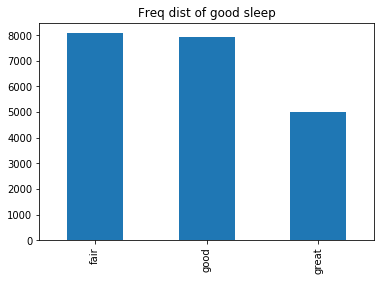

In [88]:
sleep['good_sleep'].value_counts().plot.bar(title='Freq dist of good sleep')

In [94]:
sleep.isna().sum()

awake                   0
breath_average          0
deep                    0
efficiency              0
light                   0
onset_latency           0
rem                     0
restless                6
rmssd                 265
score                   0
score_alignment         3
summary_date            0
temperature_delta      49
user_id                 0
weight               2964
AgeRange             2964
Ht_Range             2964
good_sleep              3
dtype: int64

In [97]:
### Fill all NaN to 0

sleep['rmssd'].fillna(0, inplace=True)
sleep['restless'].fillna(0, inplace=True)
sleep['score_alignment'].fillna(0, inplace=True)
sleep['temperature_delta'].fillna(0, inplace=True)
sleep['weight'].fillna(100, inplace=True)
sleep['AgeRange'].fillna('18-35', inplace=True)
sleep['Ht_Range'].fillna('170-180', inplace=True)
sleep['good_sleep'].fillna('good', inplace=True)

In [98]:
sleep.isna().sum()

awake                0
breath_average       0
deep                 0
efficiency           0
light                0
onset_latency        0
rem                  0
restless             0
rmssd                0
score                0
score_alignment      0
summary_date         0
temperature_delta    0
user_id              0
weight               0
AgeRange             0
Ht_Range             0
good_sleep           0
dtype: int64

ValueError: cannot convert float NaN to integer

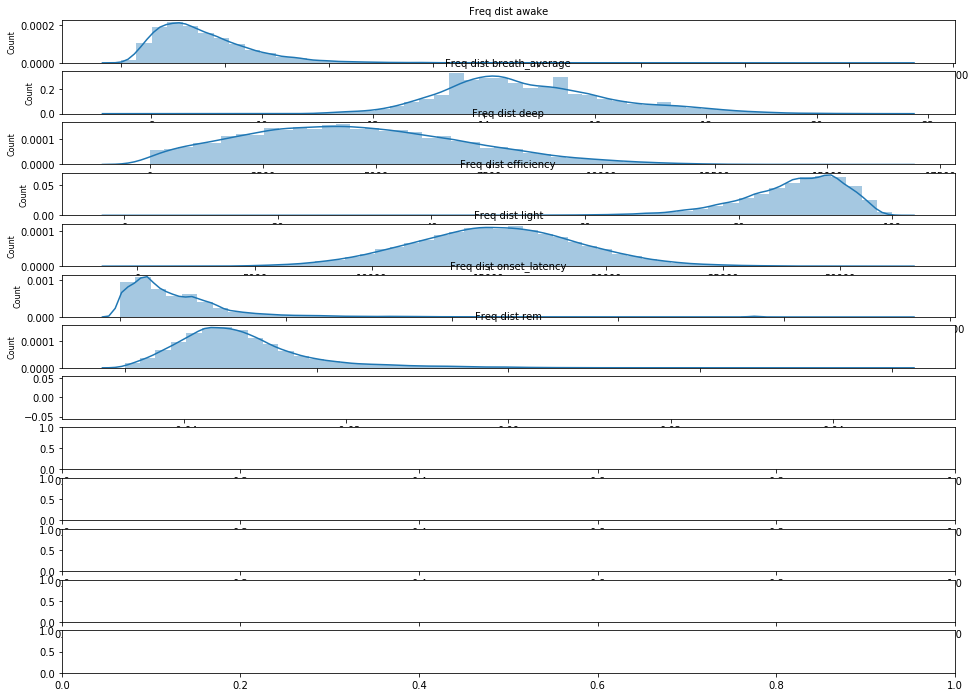

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
col_names = ['awake', 'breath_average', 'deep', 'efficiency', 'light',
       'onset_latency', 'rem', 'restless', 'rmssd', 'score', 'score_alignment', 'temperature_delta', 'weight']


fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(sleep[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

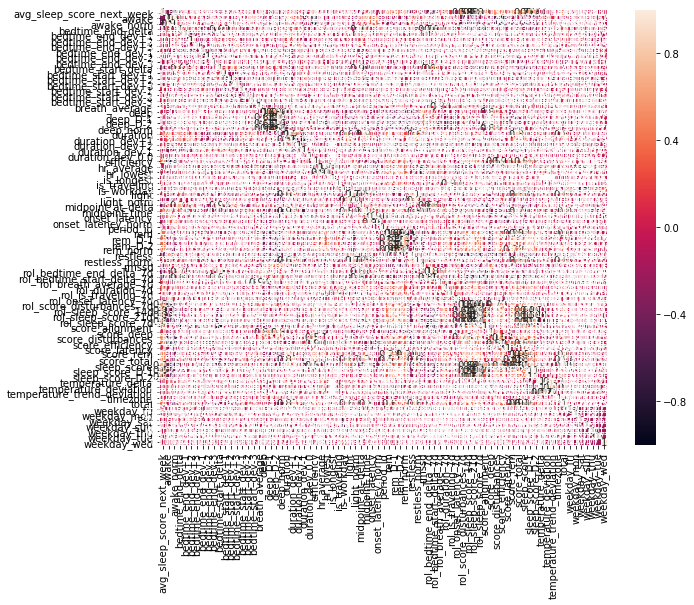

In [17]:
f, ax = plt.subplots(figsize=(10, 8))
corr = sleep.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot = True)

From the correlation plot, we can see that following attributes are highly correlated to score and thus good_sleep:

we need to remove these from the dataset in order to not overly influence the algorithm with these attributes: awake, efficiency, rem, restlessness, score_alignment.

In [105]:
## remove : awake, efficiency, rem, restlessness, score_alignment.

sleep.drop('awake', axis=1, inplace=True)
sleep.drop('efficiency', axis=1, inplace=True)
sleep.drop('rem', axis=1, inplace=True)
sleep.drop('restless', axis=1, inplace=True)
sleep.drop('score_alignment', axis=1, inplace=True)

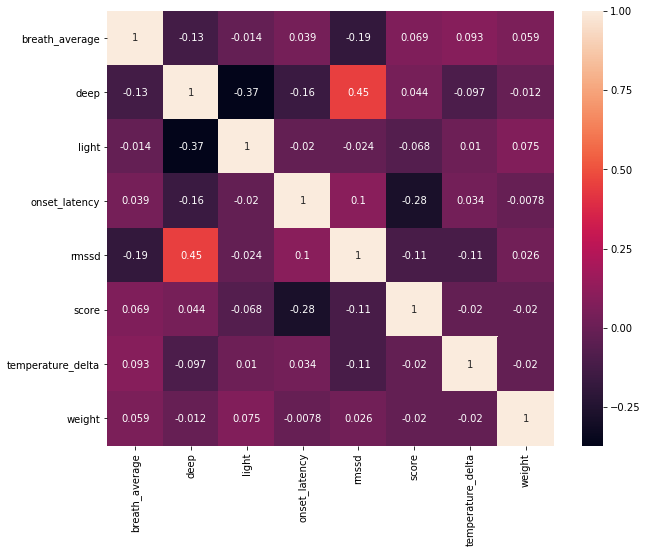

In [106]:
f, ax = plt.subplots(figsize=(10, 8))
corr = sleep.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot = True)

In [107]:
activity.columns

Index(['age', 'average_met', 'cal_active', 'cal_total', 'class_5min',
       'daily_movement', 'day_end', 'day_start', 'gender', 'height', 'high',
       'inactive', 'inactivity_alerts', 'low', 'medium', 'met_1min',
       'met_min_high', 'met_min_inactive', 'met_min_low', 'met_min_medium',
       'non_wear', 'rest', 'score', 'score_meet_daily_targets',
       'score_move_every_hour', 'score_recovery_time', 'score_stay_active',
       'score_training_frequency', 'score_training_volume', 'steps',
       'summary_date', 'target_calories', 'target_km', 'target_miles',
       'timezone', 'to_target_km', 'to_target_miles', 'total', 'user_id',
       'weight'],
      dtype='object')

In [108]:
## Activity Table ONLY
## Ensure there are no blanks first before running this cell
activity['high'] = activity.high/(24*60)
activity['inactive'] = activity.inactive/(24*60)
activity['low'] = activity.low/(24*60)
activity['medium'] = activity.medium/(24*60)
activity['met_min_high'] = activity.met_min_high/(24*60)
activity['met_min_inactive'] = activity.met_min_inactive/(24*60)
activity['met_min_low'] = activity.met_min_low/(24*60)
activity['met_min_medium'] = activity.met_min_medium/(24*60)
activity['non_wear'] = activity.non_wear/(24*60)
activity['rest'] = activity.rest/(24*60)
activity['summary_date'] = pd.DatetimeIndex(activity.summary_date) # assign to previous day


## Drop list in the end
activity.drop('cal_total', axis=1, inplace=True)
activity.drop('class_5min', axis=1, inplace=True)
activity.drop('day_end', axis=1, inplace=True)
activity.drop('day_start', axis=1, inplace=True)
activity.drop('gender', axis=1, inplace=True)
activity.drop('height', axis=1, inplace=True)
activity.drop('age', axis=1, inplace=True)
activity.drop('met_1min', axis=1, inplace=True)
activity.drop('score', axis=1, inplace=True)
activity.drop('target_calories', axis=1, inplace=True)
activity.drop('target_km', axis=1, inplace=True)
activity.drop('target_miles', axis=1, inplace=True)
activity.drop('timezone', axis=1, inplace=True)
activity.drop('to_target_km', axis=1, inplace=True)
activity.drop('to_target_miles', axis=1, inplace=True)
activity.drop('weight', axis=1, inplace=True)



In [113]:
activity.columns

Index(['average_met', 'cal_active', 'daily_movement', 'high', 'inactive',
       'inactivity_alerts', 'low', 'medium', 'met_min_high',
       'met_min_inactive', 'met_min_low', 'met_min_medium', 'non_wear', 'rest',
       'score_meet_daily_targets', 'score_move_every_hour',
       'score_recovery_time', 'score_stay_active', 'score_training_frequency',
       'score_training_volume', 'steps', 'summary_date', 'total', 'user_id'],
      dtype='object')

In [112]:
activity.isna().sum()

average_met                 0
cal_active                  0
daily_movement              0
high                        0
inactive                    0
inactivity_alerts           0
low                         0
medium                      0
met_min_high                0
met_min_inactive            0
met_min_low                 0
met_min_medium              0
non_wear                    0
rest                        0
score_meet_daily_targets    0
score_move_every_hour       0
score_recovery_time         0
score_stay_active           0
score_training_frequency    0
score_training_volume       0
steps                       0
summary_date                0
total                       0
user_id                     0
dtype: int64

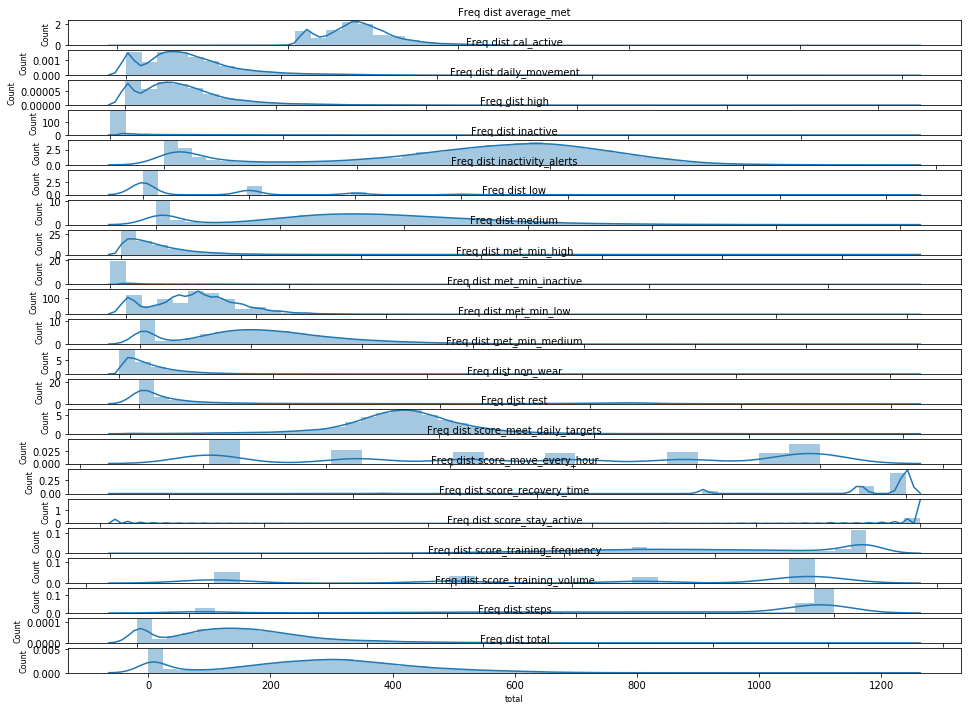

In [114]:
from matplotlib import pyplot as plt
import seaborn as sns
col_names = ['average_met', 'cal_active', 'daily_movement', 'high', 'inactive',
       'inactivity_alerts', 'low', 'medium', 'met_min_high',
       'met_min_inactive', 'met_min_low', 'met_min_medium', 'non_wear', 'rest',
       'score_meet_daily_targets', 'score_move_every_hour',
       'score_recovery_time', 'score_stay_active', 'score_training_frequency',
       'score_training_volume', 'steps','total']


fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(activity[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

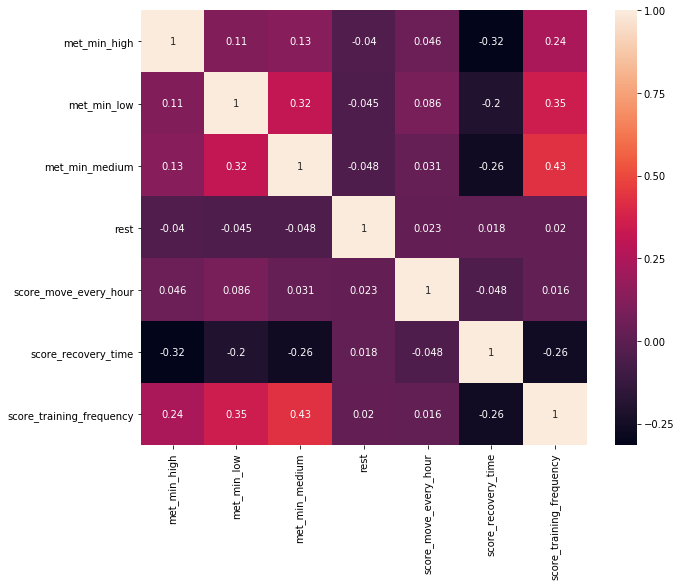

In [147]:
f, ax = plt.subplots(figsize=(10, 8))
corr = activity.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot = True)

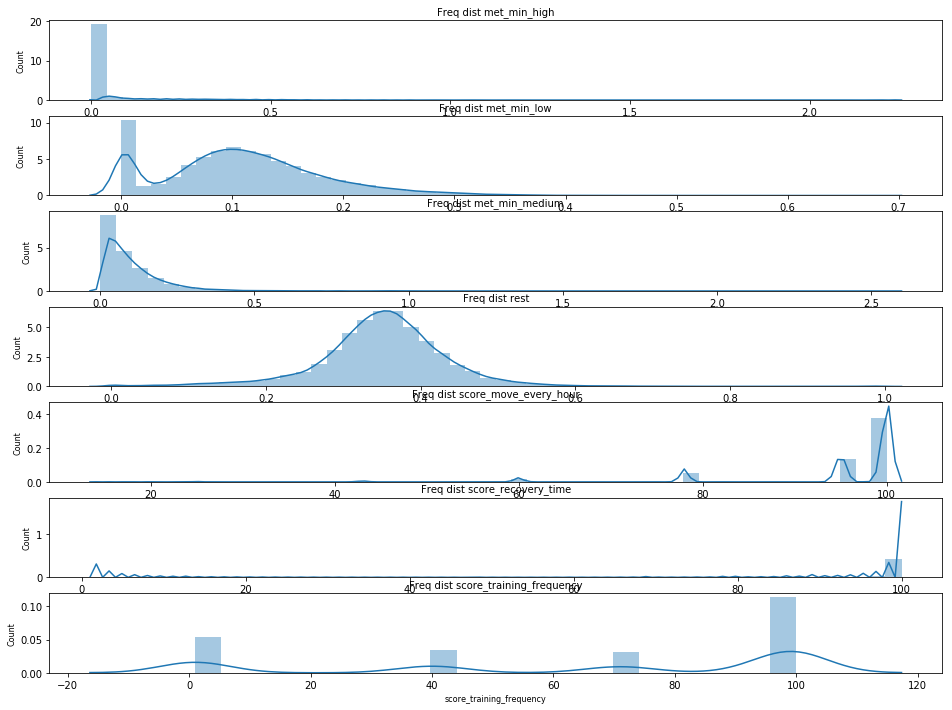

In [149]:

from matplotlib import pyplot as plt
import seaborn as sns
col_names = ['met_min_high',
       'met_min_low', 'met_min_medium','rest','score_move_every_hour',
       'score_recovery_time', 'score_training_frequency']


fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(activity[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

In [ ]:
## After doing correlation analysis, we drop redundant features.

activity.drop('cal_active', axis=1, inplace=True)
activity.drop('non_wear', axis=1, inplace=True)
activity.drop('score_meet_daily_targets', axis=1, inplace=True)
activity.drop('daily_movement', axis=1, inplace=True)
activity.drop('high', axis=1, inplace=True)
activity.drop('medium', axis=1, inplace=True)
activity.drop('low', axis=1, inplace=True)
activity.drop('inactivity_alerts', axis=1, inplace=True)
activity.drop('inactive', axis=1, inplace=True)
activity.drop('steps', axis=1, inplace=True)
activity.drop('total', axis=1, inplace=True)
activity.drop('met_min_inactive', axis=1, inplace=True)
activity.drop('average_met', axis=1, inplace=True)
activity.drop('score_training_volume', axis=1, inplace=True)
activity.drop('score_stay_active', axis=1, inplace=True)






In [117]:
readiness['summary_date'] = pd.DatetimeIndex(readiness.summary_date)

readiness.drop('age', axis=1, inplace=True)
readiness.drop('gender', axis=1, inplace=True)
readiness.drop('height', axis=1, inplace=True)
readiness.drop('weight', axis=1, inplace=True)
readiness.drop('period_id', axis=1, inplace=True)






In [151]:
readiness.drop('period_id', axis=1, inplace=True)



In [152]:
readiness.columns , readiness.shape

(Index(['score', 'score_activity_balance', 'score_previous_day',
        'score_previous_night', 'score_recovery_index', 'score_resting_hr',
        'score_sleep_balance', 'score_temperature', 'summary_date', 'user_id'],
       dtype='object'), (21625, 10))

In [153]:
readiness.isna().sum()

score                     0
score_activity_balance    0
score_previous_day        0
score_previous_night      0
score_recovery_index      0
score_resting_hr          0
score_sleep_balance       0
score_temperature         0
summary_date              0
user_id                   0
dtype: int64

#### Create a single feature space with the predictors and the target variable

In [166]:
### Save this SILVER COPY to DISK -- remove redundant columns

merged_df_final.drop('user_id', axis=1, inplace=True)
merged_df_final.drop('score_y', axis=1, inplace=True)
merged_df_final.drop('weight', axis=1, inplace=True)
merged_df_final.drop('score_x', axis=1, inplace=True)



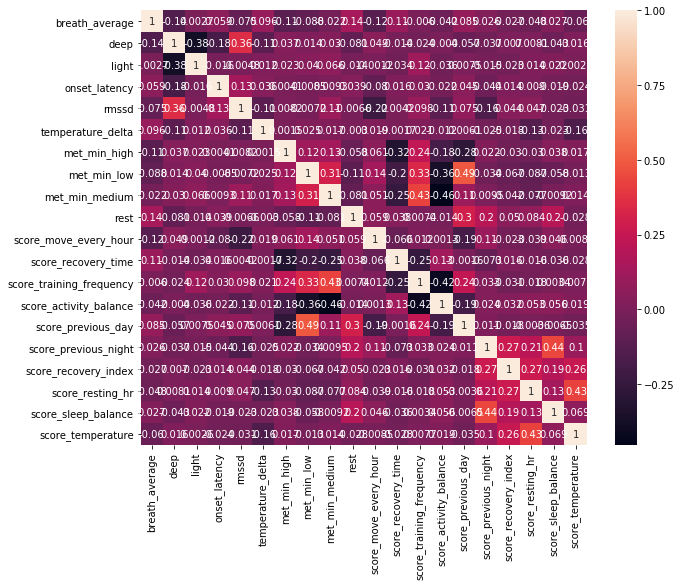

In [169]:
f, ax = plt.subplots(figsize=(10, 8))
corr = merged_df_final.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot = True)

In [170]:
merged_df_final.to_csv('oura_dataset_gold_v1.csv', index=None, encoding='utf-8')


In [17]:
!ls -la 

total 2462420
drwxr-xrwx 1 root root       4096 Nov  3 18:37 .
drwxr-xr-x 1 root root       4096 Oct 19 19:50 ..
drwxr-xr-x 6 root root       4096 Oct 20 19:57 .cache
drwxr-xr-x 3 root root       4096 Oct 19 19:57 .config
-rw------- 1 root root 2959187968 Nov  3 00:57 core
drwxr-xrwx 1 root root       4096 Oct 26 23:20 data
drwxr-xr-x 3 root root       4096 Nov  3 00:51 data_ingestion
-rw-r--r-- 1 root root      73625 Nov  3 00:40 data_ingestion_and_transform_COPY.ipynb
-rw-r--r-- 1 root root      37205 Nov  2 22:00 data_ingestion_and_transform.ipynb
-rw-r--r-- 1 root root      88094 Nov  2 22:00 gold_nb_pt.ipynb
drwxr-xrwx 1 root root       4096 Oct  4 05:40 h2oai_client_demo
-rw-r--r-- 1 root root     148685 Nov  2 23:51 hw2_workbook.ipynb
drwxr-xr-x 2 root root       4096 Nov  2 23:47 .ipynb_checkpoints
drwxr-xr-x 5 root root       4096 Oct 19 19:55 .ipython
drwx------ 3 root root       4096 Oct 19 19:50 .local
-rw-r--r-- 1 root root    2088309 Nov  3 18:37 model development_iterati

Now we convert csv files to a zip file for storage.

#### Iteration 2 - H2O AutoML Regression

Start H2O

In [5]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_171"; OpenJDK Runtime Environment (build 1.8.0_171-b10); OpenJDK 64-Bit Server VM (build 25.171-b10, mixed mode)
  Starting server from /opt/h2oai/dai/python/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpl1s3ysw1
  JVM stdout: /tmp/tmpl1s3ysw1/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpl1s3ysw1/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.1
H2O cluster version age:,3 months and 21 days !!!
H2O cluster name:,H2O_from_python_unknownUser_fh5wys
H2O cluster total nodes:,1
H2O cluster free memory:,6.893 Gb
H2O cluster total cores:,32
H2O cluster allowed cores:,32
H2O cluster status:,"accepting new members, healthy"


#### Load Data
For the AutoML regression iteration, we use the trimmed down simple dataset. The goal here is to predict the sleep score(1-100), given the activity and readiness from Oura data. In this iteration, you will use H2O's AutoML to outperform the state of the art results on this task.

In [6]:
# Load data into H2O
df_gold.to_csv('gold.csv', encoding='utf-8')

data_path = 'gold.csv'
df = h2o.import_file(data_path)
## Convert the target label to a factor so AutoML knows this is a classification problem


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [9]:
df.nrows

24995

In [11]:
feature_list = [
 'avg_sleep_score_next_week',
 'awake_norm',
 'bedtime_end_delta',
 'bedtime_start_delta',
 'breath_average',
 'deep_norm',
 'efficiency',
 'is_longest',
 'is_traveling',
 'is_workday',
 'light_norm',
 'midpoint_at_delta',
 'midpoint_time',
 'onset_latency_norm',
 'rem_norm',
 'restless_norm',
 'rol_bedtime_end_delta_7d',
 'rol_bedtime_start_delta_7d',
 'rol_is_traveling_7d',
 'rol_onset_latency_7d',
 'rol_score_disturbances_7d',
 'age_bin',
 'height_bin',
 'weight_bin',
 'rol_score_move_every_hour_7d',
 'rol_score_stay_active_7d',
 'rol_beforesleep_exercise_min_7d',
 'rol_afterwake_exercise_min_7d',
 'rol_noon_exercise_min_7d',
 'rol_eve_exercise_min_7d',
 'score_previous_day',
 'score_previous_night',
 'score_sleep_balance']

Let's take a look at this bronze copy.

In [12]:
y = 'avg_sleep_score_next_week'
y_class = 'good_sleep'
x = feature_list # shorter set of features


In [13]:
splits = df.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

In [41]:
aml = H2OAutoML(max_runtime_secs = 60, seed = 1, project_name = "oura_sleep_prediction")
aml.train(x = x,y = y, training_frame = train, leaderboard_frame = test)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [29]:
aml_cls = H2OAutoML(max_runtime_secs = 60, seed = 1, project_name = "oura_sleep_quality")
aml_cls.train(x = x, y = y_class, training_frame = train, leaderboard_frame = test)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [30]:
aml2 = H2OAutoML(max_runtime_secs = 60, seed = 1, project_name = "oura_sleep_prediction")
aml2.train(x = x, y = y, training_frame = df)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [31]:
aml2_cls = H2OAutoML(max_runtime_secs = 60, seed = 1, project_name = "oura_sleep_quality")
aml2_cls.train(x = x, y = y_class, training_frame = df)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [42]:
lb = aml.leaderboard
lb.head()
lb.head(rows=lb.nrows) # Entire leaderboard

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GLM_grid_1_AutoML_20191106_022205_model_1,18.8947,4.3468,18.8947,3.37464,0.0586825
StackedEnsemble_BestOfFamily_AutoML_20191106_022205,18.8951,4.34685,18.8951,3.37622,0.0586982
StackedEnsemble_BestOfFamily_AutoML_20191106_021952,18.9809,4.35671,18.9809,3.38263,0.0588421
GLM_grid_1_AutoML_20191106_022707_model_1,18.9816,4.35679,18.9816,3.38099,0.0588251
GLM_grid_1_AutoML_20191106_021952_model_1,18.9816,4.35679,18.9816,3.38099,0.0588251
GLM_grid_1_AutoML_20191106_021446_model_1,70.0005,8.36663,70.0005,6.80874,0.112671
GLM_grid_1_AutoML_20191106_021217_model_1,70.012,8.36732,70.012,6.80829,0.112687


In [43]:
lb_cls = aml_cls.leaderboard
lb_cls.head()
lb_cls.head(rows=lb.nrows) # Entire leaderboard

model_id,mean_per_class_error,logloss,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20191106_021336,0.00302273,0.0129439,0.0507442,0.00257497
StackedEnsemble_AllModels_AutoML_20191106_021336,0.00302273,0.0129439,0.0507442,0.00257497
DRF_1_AutoML_20191106_021336,0.00338374,0.0972509,0.131748,0.0173577
GBM_1_AutoML_20191106_022311,0.0325397,0.0827132,0.153003,0.0234098
GBM_1_AutoML_20191106_022100,0.0348918,0.0860034,0.156642,0.0245368
GBM_2_AutoML_20191106_022100,0.0375857,0.114248,0.17345,0.0300851
DRF_1_AutoML_20191106_022311,0.0412775,0.153841,0.196654,0.0386729


In [71]:
# Get the best non-ensemble model
model1 = h2o.get_model(lb[4,"model_id"])

In [72]:
# Get the best non-ensemble model
model2 = h2o.get_model(lb_cls[4,"model_id"])

In [73]:
perf_cls = model2.model_performance()
perf_cls


ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.0034840965751636935
RMSE: 0.05902623632897234
LogLoss: 0.02344609030105972
Mean Per-Class Error: 0.0013116830620265394
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



fair,good,greate,Error,Rate
8650.0,5.0,0.0,0.0005777,"5 / 8,655"
4.0,7137.0,0.0,0.0005601,"4 / 7,141"
0.0,12.0,4278.0,0.0027972,"12 / 4,290"
8654.0,7154.0,4278.0,0.0010455,"21 / 20,086"


Top-3 Hit Ratios: 


k,hit_ratio
1,0.9989545
2,1.0
3,1.0


In [74]:
perf = model1.model_performance()
perf


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 19.01426162434061
RMSE: 4.360534557177664
MAE: 3.3691368225062948
RMSLE: 0.058847369636990686
R^2: 0.7323566098903458
Mean Residual Deviance: 19.01426162434061
Null degrees of freedom: 17708
Residual degrees of freedom: 17663
Null deviance: 1258105.2682359912
Residual deviance: 336723.55910544784
AIC: 102506.32244930844


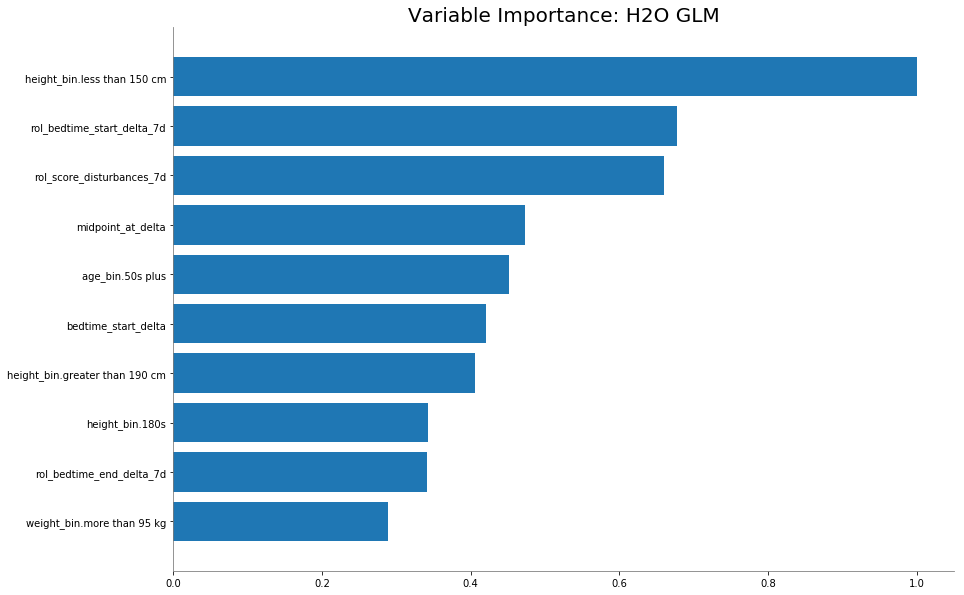

In [75]:
model1.varimp_plot()

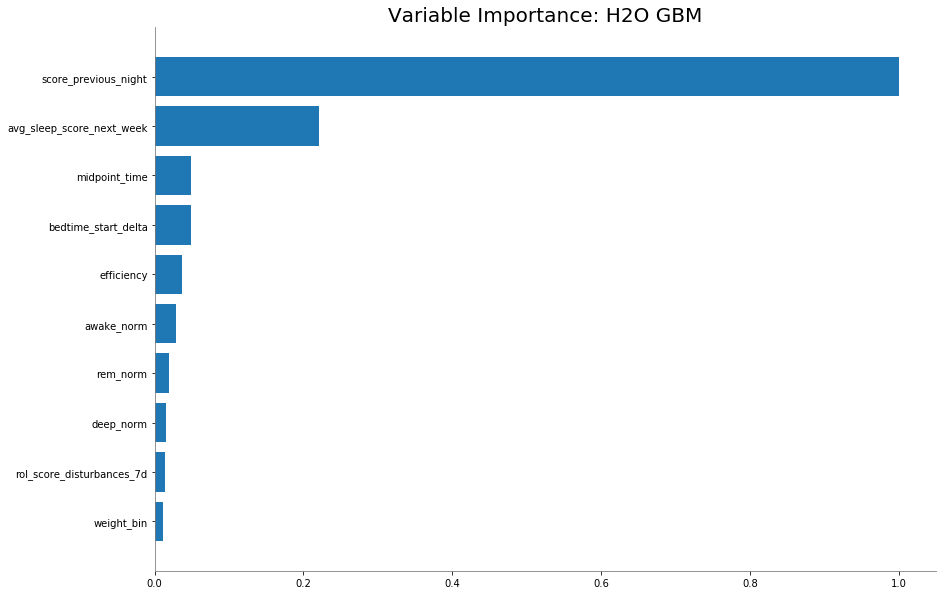

In [76]:
model2.varimp_plot()

In [79]:
perf_cls


ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.0034840965751636935
RMSE: 0.05902623632897234
LogLoss: 0.02344609030105972
Mean Per-Class Error: 0.0013116830620265394
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



fair,good,greate,Error,Rate
8650.0,5.0,0.0,0.0005777,"5 / 8,655"
4.0,7137.0,0.0,0.0005601,"4 / 7,141"
0.0,12.0,4278.0,0.0027972,"12 / 4,290"
8654.0,7154.0,4278.0,0.0010455,"21 / 20,086"


Top-3 Hit Ratios: 


k,hit_ratio
1,0.9989545
2,1.0
3,1.0


In [80]:
lb = aml2.leaderboard
lb.head()
lb.head(rows=lb.nrows) # Entire leaderboard

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GLM_grid_1_AutoML_20191106_022205_model_1,18.8947,4.3468,18.8947,3.37464,0.0586825
StackedEnsemble_BestOfFamily_AutoML_20191106_022205,18.8951,4.34685,18.8951,3.37622,0.0586982
StackedEnsemble_BestOfFamily_AutoML_20191106_021952,18.9809,4.35671,18.9809,3.38263,0.0588421
GLM_grid_1_AutoML_20191106_022707_model_1,18.9816,4.35679,18.9816,3.38099,0.0588251
GLM_grid_1_AutoML_20191106_021952_model_1,18.9816,4.35679,18.9816,3.38099,0.0588251
GLM_grid_1_AutoML_20191106_021446_model_1,70.0005,8.36663,70.0005,6.80874,0.112671
GLM_grid_1_AutoML_20191106_021217_model_1,70.012,8.36732,70.012,6.80829,0.112687


In [81]:
# Get the best non-ensemble model
model2 = h2o.get_model(lb_cls[4,"model_id"])

In [82]:
pred = model2.predict(test)
pred.head()

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,fair,good,greate
good,0.210358,0.78853,0.00111196
greate,0.000165796,0.00279489,0.997039
good,0.00103788,0.99744,0.00152247
good,0.00199562,0.997412,0.000592148
good,0.000992382,0.99566,0.00334767
good,0.000875738,0.998399,0.000725719
fair,0.991637,0.00824596,0.000117082
good,0.000820157,0.998418,0.000761709
good,0.000995145,0.998032,0.000972383
good,0.000721943,0.998436,0.000841862


In [85]:
perf = model2.model_performance(test)
perf


ModelMetricsMultinomial: gbm
** Reported on test data. **

MSE: 0.024196599857832735
RMSE: 0.15555256300631223
LogLoss: 0.08702290461840179
Mean Per-Class Error: 0.03363288334141462
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



fair,good,greate,Error,Rate
2018.0,58.0,0.0,0.0279383,"58 / 2,076"
40.0,1720.0,22.0,0.0347924,"62 / 1,782"
1.0,39.0,1008.0,0.0381679,"40 / 1,048"
2059.0,1817.0,1030.0,0.0326131,"160 / 4,906"


Top-3 Hit Ratios: 


k,hit_ratio
1,0.9673869
2,0.9997962
3,1.0


In [86]:
print (model2)
print('Generate predictions…')
test_y = model2.predict(test)
test_y = test_y.as_data_frame()
print(test_y)

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_1_AutoML_20191106_022100

Model Summary: 


,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,113.0,339.0,252865.0,6.0,6.0,6.0,27.0,64.0,54.858406




ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.0034840965751636935
RMSE: 0.05902623632897234
LogLoss: 0.02344609030105972
Mean Per-Class Error: 0.0013116830620265394
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



fair,good,greate,Error,Rate
8650.0,5.0,0.0,0.0005777,"5 / 8,655"
4.0,7137.0,0.0,0.0005601,"4 / 7,141"
0.0,12.0,4278.0,0.0027972,"12 / 4,290"
8654.0,7154.0,4278.0,0.0010455,"21 / 20,086"


Top-3 Hit Ratios: 


k,hit_ratio
1,0.9989545
2,1.0
3,1.0



ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.024536775770884058
RMSE: 0.15664219026457737
LogLoss: 0.08600343146546366
Mean Per-Class Error: 0.03489181421042665
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



fair,good,greate,Error,Rate
8418.0,236.0,1.0,0.0273830,"237 / 8,655"
182.0,6897.0,62.0,0.0341689,"244 / 7,141"
2.0,183.0,4105.0,0.0431235,"185 / 4,290"
8602.0,7316.0,4168.0,0.0331574,"666 / 20,086"


Top-3 Hit Ratios: 


k,hit_ratio
1,0.9668426
2,0.9997013
3,1.0


Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.9668427,0.0009462,0.9648992,0.9683844,0.9656546,0.9678865,0.9673886
err,0.0331574,0.0009462,0.0351008,0.0316156,0.0343454,0.0321135,0.0326114
err_count,133.2,3.8052595,141.0,127.0,138.0,129.0,131.0
logloss,0.0860033,0.0034868,0.0942788,0.0851371,0.0878862,0.0830342,0.0796803
max_per_class_error,0.0431240,0.0012144,0.0407240,0.0419664,0.0436321,0.0434783,0.0458190
mean_per_class_accuracy,0.9651177,7.9214E-4,0.9637778,0.9667888,0.9639845,0.9657204,0.9653169
mean_per_class_error,0.0348823,7.9214E-4,0.0362222,0.0332112,0.0360155,0.0342796,0.0346831
mse,0.0245367,0.0010810,0.0269886,0.0236352,0.0255922,0.0236529,0.0228147
r2,0.9589207,0.0016870,0.9556078,0.9601532,0.9567202,0.9600714,0.9620508
rmse,0.1565671,0.0034251,0.1642820,0.1537375,0.1599755,0.1537951,0.1510454


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error
,2019-11-06 02:21:42,14.278 sec,0.0,0.6666667,1.0986123,0.6381559
,2019-11-06 02:21:42,14.417 sec,5.0,0.4366139,0.5739256,0.0467490
,2019-11-06 02:21:42,14.567 sec,10.0,0.3409019,0.4078801,0.0410734
,2019-11-06 02:21:43,14.695 sec,15.0,0.2506118,0.2651146,0.0364433
,2019-11-06 02:21:43,14.825 sec,20.0,0.2074481,0.1953902,0.0348501
---,---,---,---,---,---,---
,2019-11-06 02:21:44,16.614 sec,95.0,0.0723873,0.0299570,0.0028378
,2019-11-06 02:21:45,16.724 sec,100.0,0.0681489,0.0278259,0.0020910
,2019-11-06 02:21:45,16.833 sec,105.0,0.0648185,0.0261107,0.0015434
,2019-11-06 02:21:45,16.954 sec,110.0,0.0611646,0.0244366,0.0010455



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
score_previous_night,34554.7343750,1.0,0.6466555
avg_sleep_score_next_week,7647.3051758,0.2213099,0.1431113
midpoint_time,1712.8935547,0.0495704,0.0320550
bedtime_start_delta,1696.5708008,0.0490981,0.0317495
efficiency,1280.0231934,0.0370434,0.0239543
---,---,---,---
rol_beforesleep_exercise_min_7d,94.4300537,0.0027328,0.0017672
score_previous_day,54.5124016,0.0015776,0.0010201
is_traveling,39.6525955,0.0011475,0.0007421
is_longest,12.6249857,0.0003654,0.0002363



See the whole table with table.as_data_frame()

Generate predictions…
gbm prediction progress: |████████████████████████████████████████████████| 100%
     predict      fair      good    greate
0       good  0.210358  0.788530  0.001112
1     greate  0.000166  0.002795  0.997039
2       good  0.001038  0.997440  0.001522
3       good  0.001996  0.997412  0.000592
4       good  0.000992  0.995660  0.003348
5       good  0.000876  0.998399  0.000726
6       fair  0.991637  0.008246  0.000117
7       good  0.000820  0.998418  0.000762
8       good  0.000995  0.998032  0.000972
9       good  0.000722  0.998436  0.000842
10      fair  0.883052  0.116572  0.000376
11      good  0.016525  0.981915  0.001560
12      good  0.005714  0.980517  0.013769
13      good  0.001541  0.988366  0.010093
14      fair  0.999866  0.000104  0.000030
15      good  0.000768  0.998770  0.000462
16      good  0.119044  0.880352  0.000603
17      fair  0.999172  0.000750  0.000077
18      fair  0.999826  0.00014

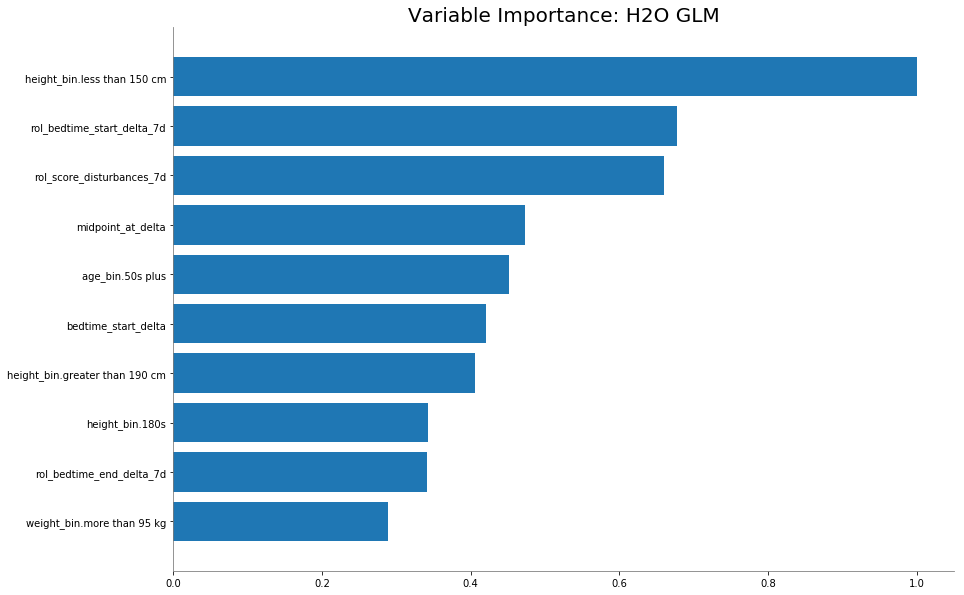

In [87]:
model1.varimp_plot()

In [88]:
sh = model2.score_history()
sh = pd.DataFrame(sh)


In [89]:
sh.columns

Index(['', 'timestamp', 'duration', 'number_of_trees', 'training_rmse',
       'training_logloss', 'training_classification_error'],
      dtype='object')

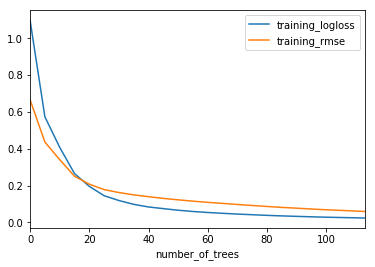

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline 
# plot training training_rmse and training_mae
sh.plot(x='number_of_trees', y = ['training_logloss','training_rmse'])

In [92]:
sh = model1.score_history()
sh = pd.DataFrame(sh)


In [93]:
sh.columns

Index(['', 'timestamp', 'duration', 'iteration', 'lambda', 'predictors',
       'deviance_train', 'deviance_test', 'deviance_xval', 'deviance_se'],
      dtype='object')

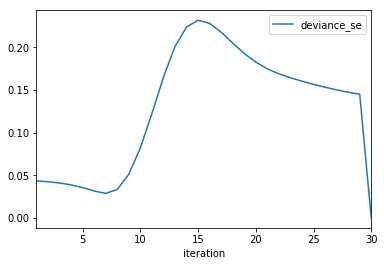

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline 
# plot training training_rmse and training_mae
sh.plot(x='iteration', y = ['deviance_se'])